Simple linear regression model


In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


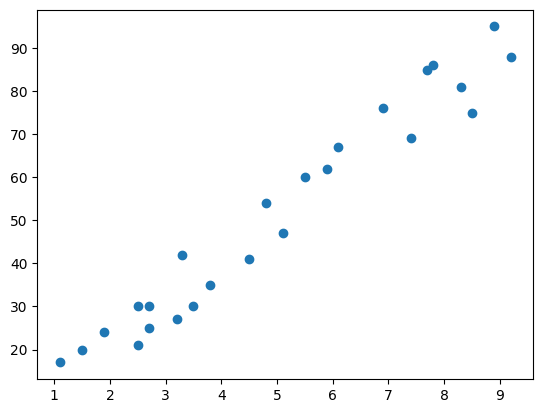

In [83]:
dataset = pd.read_csv('studentscores.csv')
plt.scatter(dataset['Hours'], dataset['Scores'])
plt.show()


In [84]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values


In [85]:
print(x,y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]] [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


building model and prediction method

In [86]:
class Model():
  def __init__(self,learning_rate, iteration):
    self.learning_rate = learning_rate
    self.iteration = iteration

  def predict(self,x):
    return x.dot(self.slope) + self.const

  def fit(self,x,y):
    self.m, self.n = x.shape
    self.slope = np.zeros(self.n)
    self.const = 0
    self.x = x
    self.y =y

    for i in range(self.iteration):
      self.update_weights()
    return self

  def update_weights(self):
    y_pred = self.predict(self.x)
    dw = - (2 * (self.x.T).dot(self.y - y_pred)) / self.m
    db = - 2 * np.sum(self.y - y_pred) / self.m

    self.slope -= self.learning_rate * dw
    self.const -= self.learning_rate * db

    return self

In [87]:
model = Model(learning_rate=0.01, iteration=1000)
model.fit(x,y)

In [88]:
y_pred = model.predict(x)
print(y_pred)


[26.91171724 52.33687281 33.75695143 85.58515317 36.69062323 17.13281125
 92.43038736 56.24843521 83.62937197 28.86749844 77.76202838 60.1599976
 46.46952922 34.73484203 13.22124886 89.49671557 26.91171724 21.04437365
 62.1157788  74.82835658 28.86749844 49.40320102 39.62429503 69.93890359
 78.73991898]


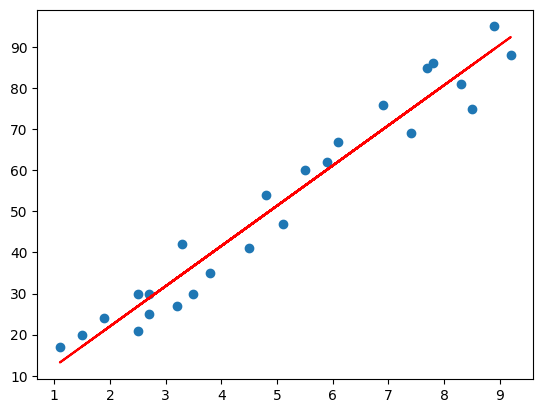

In [89]:
plt.scatter(dataset['Hours'],dataset['Scores'])
plt.plot(x,y_pred, color='red')
plt.show()

In [90]:
print(model.slope,model.const)

[9.77890599] 2.4644522714760995


In [91]:
import numpy as np

class LinearRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.iterations):
            y_predicted = self.predict(X)
            # Calculate Mean Squared Error (MSE) as loss
            loss = np.mean((y_predicted - y)**2)

            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            if (i+1) % 100 == 0:  # Print loss every 100 iterations
                print(f'Iteration {i+1}: Loss = {loss:.4f}')


    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [92]:
# Instantiate and train the model
# You can change the learning_rate and iterations values here
model = LinearRegression(learning_rate=0.01, iterations=50)
model.fit(x, y)

print("Training complete.")
print("Weights:", model.weights)
print("Bias:", model.bias)

Training complete.
Weights: [9.90529756]
Bias: 1.6814341284660261


In [93]:
dataset = pd.read_csv('50_Startups.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [94]:
print(x)
print(y)

[[165349.2  136897.8  471784.1 ]
 [162597.7  151377.59 443898.53]
 [153441.51 101145.55 407934.54]
 [144372.41 118671.85 383199.62]
 [142107.34  91391.77 366168.42]
 [131876.9   99814.71 362861.36]
 [134615.46 147198.87 127716.82]
 [130298.13 145530.06 323876.68]
 [120542.52 148718.95 311613.29]
 [123334.88 108679.17 304981.62]
 [101913.08 110594.11 229160.95]
 [100671.96  91790.61 249744.55]
 [ 93863.75 127320.38 249839.44]
 [ 91992.39 135495.07 252664.93]
 [119943.24 156547.42 256512.92]
 [114523.61 122616.84 261776.23]
 [ 78013.11 121597.55 264346.06]
 [ 94657.16 145077.58 282574.31]
 [ 91749.16 114175.79 294919.57]
 [ 86419.7  153514.11      0.  ]
 [ 76253.86 113867.3  298664.47]
 [ 78389.47 153773.43 299737.29]
 [ 73994.56 122782.75 303319.26]
 [ 67532.53 105751.03 304768.73]
 [ 77044.01  99281.34 140574.81]
 [ 64664.71 139553.16 137962.62]
 [ 75328.87 144135.98 134050.07]
 [ 72107.6  127864.55 353183.81]
 [ 66051.52 182645.56 118148.2 ]
 [ 65605.48 153032.06 107138.38]
 [ 61994.4

In [95]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()


split data to test part and training part, this is done to avoid overfitting.
Can be done directly by sikit learn's model slection

In [96]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [97]:
regressor.fit(x_train, y_train)

LinearRegression()

In [98]:
y_pred = regressor.predict(x_test)
print(y_pred)

[103901.8969696  132763.05993126 133567.90370044  72911.78976736
 179627.92567224 115166.64864795  67113.5769057   98154.80686776
 114756.11555221 169064.01408795]


In [99]:
for i, (pred,actual) in enumerate(zip(y_pred, y_test)):
    print(f"Prediction(sample) {i+1}: {pred:.2f}, Actual: {actual:.2f}")

Prediction(sample) 1: 103901.90, Actual: 103282.38
Prediction(sample) 2: 132763.06, Actual: 144259.40
Prediction(sample) 3: 133567.90, Actual: 146121.95
Prediction(sample) 4: 72911.79, Actual: 77798.83
Prediction(sample) 5: 179627.93, Actual: 191050.39
Prediction(sample) 6: 115166.65, Actual: 105008.31
Prediction(sample) 7: 67113.58, Actual: 81229.06
Prediction(sample) 8: 98154.81, Actual: 97483.56
Prediction(sample) 9: 114756.12, Actual: 110352.25
Prediction(sample) 10: 169064.01, Actual: 166187.94


In [100]:
print(regressor.coef_)
print(regressor.intercept_)

[0.77884104 0.0293919  0.03471025]
42989.00816508669


based on coeff. and intercept:
our model outputshould be:
y = 0.77884104*x1 + 0.0293919*x2 +  0.03471025*x3 + 42989.00816508669

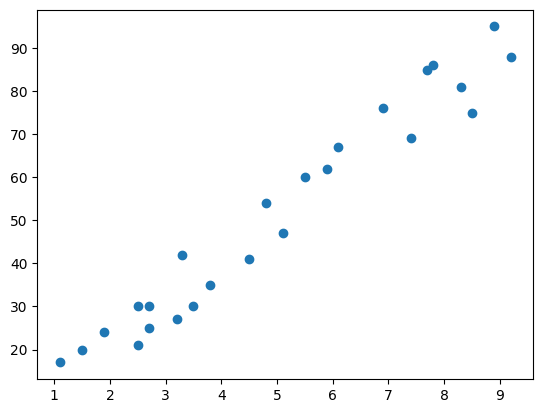

In [101]:
dataset = pd.read_csv('studentscores.csv')
plt.scatter(dataset['Hours'], dataset['Scores'])
plt.show()
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [102]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

try to fit a curved line instead of straight like
This is done using polynomial expression of 2,3 or higher degrees

In [103]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x)
print(x_poly)

[[  1.      2.5     6.25   15.625]
 [  1.      5.1    26.01  132.651]
 [  1.      3.2    10.24   32.768]
 [  1.      8.5    72.25  614.125]
 [  1.      3.5    12.25   42.875]
 [  1.      1.5     2.25    3.375]
 [  1.      9.2    84.64  778.688]
 [  1.      5.5    30.25  166.375]
 [  1.      8.3    68.89  571.787]
 [  1.      2.7     7.29   19.683]
 [  1.      7.7    59.29  456.533]
 [  1.      5.9    34.81  205.379]
 [  1.      4.5    20.25   91.125]
 [  1.      3.3    10.89   35.937]
 [  1.      1.1     1.21    1.331]
 [  1.      8.9    79.21  704.969]
 [  1.      2.5     6.25   15.625]
 [  1.      1.9     3.61    6.859]
 [  1.      6.1    37.21  226.981]
 [  1.      7.4    54.76  405.224]
 [  1.      2.7     7.29   19.683]
 [  1.      4.8    23.04  110.592]
 [  1.      3.8    14.44   54.872]
 [  1.      6.9    47.61  328.509]
 [  1.      7.8    60.84  474.552]]


x^0 , x^1, x^2, x^3

In [104]:
model = LinearRegression()
model.fit(x_poly,y)

LinearRegression()

In [105]:
print(model.coef_)
print(model.intercept_)

[ 0.         -3.79705913  2.99874775 -0.19257785]
19.317706990502344


In [106]:
y_pred = model.predict(x_poly)
print(y_pred)

[25.55820366 52.4044897  31.56390366 85.43535572 34.50588455 19.71935048
 88.24070983 57.10586101 84.27233622 27.13600857 79.9579611  61.75002055
 45.40692604 32.52310457 18.5131056  87.29327399 25.55820366 21.60788253
 64.02753655 77.39372855 27.13600857 48.88540147 37.62366789 72.62482165
 80.75625387]


<function matplotlib.pyplot.show(close=None, block=None)>

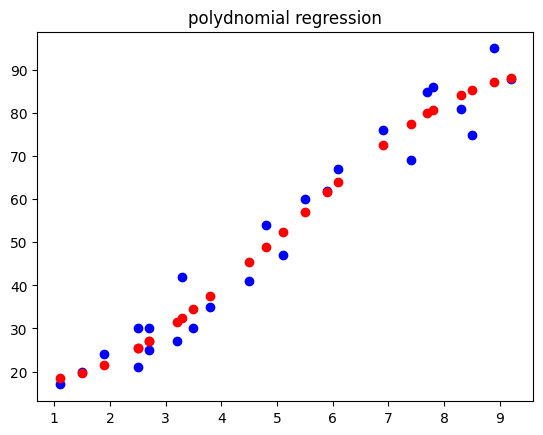

In [107]:
plt.scatter(x,y, color='blue')
plt.scatter(x,y_pred, color='red')
plt.title('polydnomial regression')

plt.show